For the data shared build a ANN classification model using Keras and perform below tasks.

• Plot the test and validation, loss and accuracy.

• Check for overfitting and apply L1 , L2 regularisation, early stopping and dropout techniques.

• Plot the accuracy and loss with different optimizers.

• Fine tune hyperparameters using Keras tuner.

• Note: Upload only the .ipynb file without zipping.

In [272]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

In [273]:
df = pd.read_csv(r'C:\Users\User\Desktop\diabetes.csv')

In [274]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [275]:
# Split data into test and train
train_dataset = df.sample(frac=0.7,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [276]:
train_stats = train_dataset.describe()
train_stats.pop("Outcome")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Pregnancies,538.0,3.847584,3.360273,0.000,1.00000,3.000,6.000,17.000
Glucose,538.0,121.553903,32.045909,0.000,99.25000,119.000,140.000,199.000
BloodPressure,538.0,68.247212,20.121795,0.000,62.00000,72.000,80.000,122.000
SkinThickness,538.0,20.180297,16.212595,0.000,0.00000,23.000,32.000,99.000
Insulin,538.0,74.011152,111.260845,0.000,0.00000,0.000,120.000,846.000
BMI,538.0,32.116543,7.816299,0.000,27.40000,32.150,36.800,57.300
DiabetesPedigreeFunction,538.0,0.474879,0.317938,0.078,0.24975,0.378,0.637,2.288
Age,538.0,33.566914,11.663348,21.000,24.00000,30.000,41.000,72.000


In [277]:
train_labels = train_dataset.pop('Outcome')   # Y_train
test_labels = test_dataset.pop('Outcome') 

In [278]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
  
X_train_n = norm(train_dataset)
X_test_n = norm(test_dataset)

In [279]:
train_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [280]:
X_train_n.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,-0.847426,2.416723,0.385293,1.407529,-0.665204,1.379612,2.890885,-0.991732
122,-0.549831,-0.454158,0.285898,0.605684,0.233585,0.189790,-0.222934,-0.905993
113,0.045358,-1.421520,-0.310470,-1.244730,-0.665204,0.240965,-0.263823,-0.734516
14,0.342953,1.386951,0.186504,-0.072801,0.907676,-0.808125,0.352650,1.494690
529,-1.145021,-0.329337,-0.161378,-1.244730,-0.665204,-0.961650,0.582255,-0.220084


In [281]:
# Build model
model = Sequential()
model.add(Dense(64, input_shape=(8,), activation='relu'))  
model.add(Dense(64, activation='relu'))   
model.add(Dense(1,activation='sigmoid'))  

In [282]:
#optimizer

In [283]:
opt = tf.keras.optimizers.Adam()

In [284]:
# compile model 
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [285]:
history = model.fit(X_train_n, train_labels, epochs = 85,batch_size=9)

Epoch 1/85
60/60 [==============================] - 1s 1ms/step - loss: 0.5836 - accuracy: 0.7398
Epoch 2/85
60/60 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7751
Epoch 3/85
60/60 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7788
Epoch 4/85
60/60 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.7937
Epoch 5/85
60/60 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.7974
Epoch 6/85
60/60 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8030
Epoch 7/85
60/60 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8048
Epoch 8/85
60/60 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8216
Epoch 9/85
60/60 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8086
Epoch 10/85
60/60 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8216
Epoch 11/85
60/60 [

In [286]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
   # plt.plot(hist['epoch'], hist['val_mae'], label = 'Validation Error')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Error')
    #plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    #plt.ylim([0,200])
    plt.legend()
    plt.show()
    

    
    

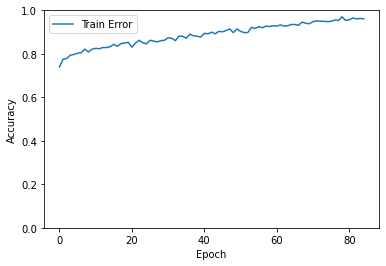

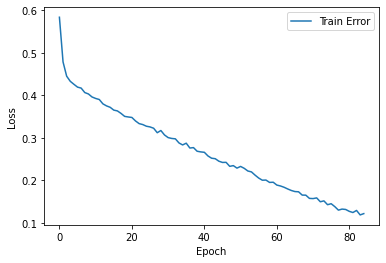

In [287]:
plot_history(history)

In [288]:
history.history

{'loss': [0.5835980772972107,
  0.4783781170845032,
  0.44481486082077026,
  0.43276163935661316,
  0.42576661705970764,
  0.4191359877586365,
  0.4168352782726288,
  0.4063206613063812,
  0.40305471420288086,
  0.3959519565105438,
  0.39245322346687317,
  0.3899710774421692,
  0.3797489106655121,
  0.3749523162841797,
  0.3716626763343811,
  0.3650286793708801,
  0.36313822865486145,
  0.35727471113204956,
  0.350262850522995,
  0.3488743007183075,
  0.34772080183029175,
  0.3395039141178131,
  0.333225280046463,
  0.3310003876686096,
  0.32711783051490784,
  0.32546916604042053,
  0.3223719596862793,
  0.311817467212677,
  0.316981703042984,
  0.3065517246723175,
  0.3003288507461548,
  0.29830247163772583,
  0.2974165976047516,
  0.2877189815044403,
  0.2830601930618286,
  0.2871550917625427,
  0.27575889229774475,
  0.2767631411552429,
  0.2682376205921173,
  0.26666951179504395,
  0.26571792364120483,
  0.2571133077144623,
  0.25179848074913025,
  0.2506779432296753,
  0.244806677

In [289]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.583598,0.739777
1,0.478378,0.775093
2,0.444815,0.778810
3,0.432762,0.793680
4,0.425767,0.797398
...,...,...
80,0.126747,0.957249
81,0.123996,0.964684
82,0.128884,0.960967
83,0.118342,0.962825


In [290]:
test_loss, test_acc = model.evaluate(X_train_n, train_labels,verbose=0)
print('Test accuracy',test_acc)
print('Test loss', test_loss)

Test accuracy 0.9739776849746704
Test loss 0.1093919575214386


# Regularization

In [291]:
# create model
model = Sequential()
model.add(Dense(64, input_shape=(8,), activation='relu',kernel_regularizer=tf.keras.regularizers.L1(l1=1e-0),bias_regularizer=tf.keras.regularizers.L1(l=1e-0)))
model.add(Dense(64, input_shape=(8,), activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=1e-0),bias_regularizer=tf.keras.regularizers.L2(l=2e-0)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# compile and run model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model.fit(X_train_n, train_labels, epochs = 85,validation_split = 0.2)

Epoch 1/85
14/14 [==============================] - 1s 48ms/step - loss: 132.2682 - accuracy: 0.5837 - val_loss: 122.0905 - val_accuracy: 0.6389
Epoch 2/85
14/14 [==============================] - 0s 4ms/step - loss: 114.5624 - accuracy: 0.6860 - val_loss: 105.5888 - val_accuracy: 0.6481
Epoch 3/85
14/14 [==============================] - 0s 4ms/step - loss: 98.9343 - accuracy: 0.6884 - val_loss: 91.0415 - val_accuracy: 0.6481
Epoch 4/85
14/14 [==============================] - 0s 4ms/step - loss: 85.1927 - accuracy: 0.6860 - val_loss: 78.2602 - val_accuracy: 0.6667
Epoch 5/85
14/14 [==============================] - 0s 4ms/step - loss: 73.1210 - accuracy: 0.6860 - val_loss: 67.0378 - val_accuracy: 0.6481
Epoch 6/85
14/14 [==============================] - 0s 4ms/step - loss: 62.5261 - accuracy: 0.6907 - val_loss: 57.2029 - val_accuracy: 0.6481
Epoch 7/85
14/14 [==============================] - 0s 4ms/step - loss: 53.2557 - accuracy: 0.6744 - val_loss: 48.5964 - val_accuracy: 0.6481
E

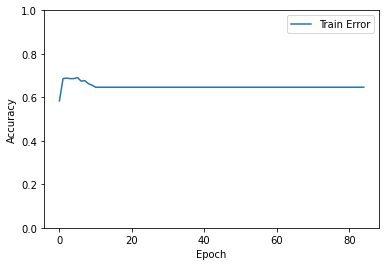

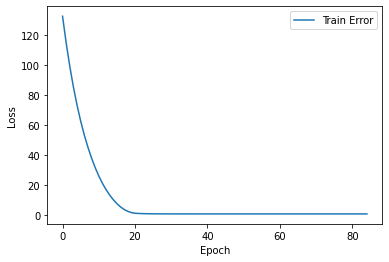

In [292]:
plot_history(history)

In [293]:
test_loss, test_acc = model.evaluate(X_train_n, train_labels,verbose=0)
print('Test accuracy',test_acc)
print('Test loss', test_loss)

Test accuracy 0.6449813842773438
Test loss 0.7121667265892029


# Early Stopping

### Early stopping

In [294]:
model = Sequential()
model.add(Dense(64, input_shape=(8,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train_n, train_labels, epochs = 85,validation_split = 0.2, verbose=1, callbacks=[early_stop])

Epoch 1/85
14/14 [==============================] - 1s 15ms/step - loss: 0.6505 - accuracy: 0.6698 - val_loss: 0.6104 - val_accuracy: 0.6852
Epoch 2/85
14/14 [==============================] - 0s 4ms/step - loss: 0.5660 - accuracy: 0.7744 - val_loss: 0.5579 - val_accuracy: 0.7407
Epoch 3/85
14/14 [==============================] - 0s 4ms/step - loss: 0.5173 - accuracy: 0.7977 - val_loss: 0.5234 - val_accuracy: 0.7407
Epoch 4/85
14/14 [==============================] - 0s 4ms/step - loss: 0.4823 - accuracy: 0.8070 - val_loss: 0.5061 - val_accuracy: 0.7315
Epoch 5/85
14/14 [==============================] - 0s 4ms/step - loss: 0.4621 - accuracy: 0.8047 - val_loss: 0.4925 - val_accuracy: 0.7500
Epoch 6/85
14/14 [==============================] - 0s 4ms/step - loss: 0.4442 - accuracy: 0.8070 - val_loss: 0.4835 - val_accuracy: 0.7593
Epoch 7/85
14/14 [==============================] - 0s 4ms/step - loss: 0.4331 - accuracy: 0.8070 - val_loss: 0.4808 - val_accuracy: 0.7593
Epoch 8/85
14/14 [=

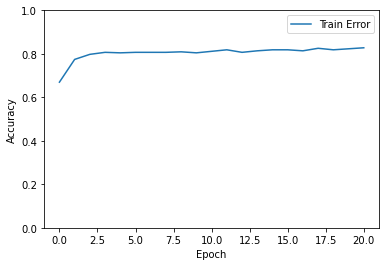

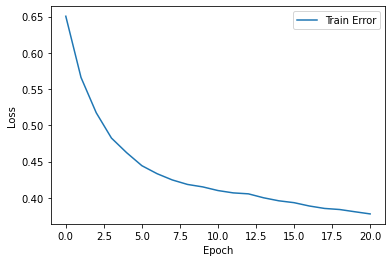

In [295]:
plot_history(history)

In [296]:
test_loss, test_acc = model.evaluate(X_train_n, train_labels,verbose=0)
print('Test accuracy',test_acc)
print('Test loss', test_loss)

Test accuracy 0.8178438544273376
Test loss 0.39436399936676025


# Dropout

In [297]:
model = Sequential()
model.add(Dense(64, input_shape=(8,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train_n, train_labels, epochs = 85,validation_split = 0.2, verbose=1)

Epoch 1/85
14/14 [==============================] - 1s 14ms/step - loss: 0.6659 - accuracy: 0.6023 - val_loss: 0.6168 - val_accuracy: 0.7407
Epoch 2/85
14/14 [==============================] - 0s 4ms/step - loss: 0.5610 - accuracy: 0.7628 - val_loss: 0.5517 - val_accuracy: 0.7778
Epoch 3/85
14/14 [==============================] - 0s 4ms/step - loss: 0.5012 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7685
Epoch 4/85
14/14 [==============================] - 0s 4ms/step - loss: 0.4653 - accuracy: 0.7860 - val_loss: 0.4724 - val_accuracy: 0.7685
Epoch 5/85
14/14 [==============================] - 0s 4ms/step - loss: 0.4417 - accuracy: 0.8000 - val_loss: 0.4553 - val_accuracy: 0.8056
Epoch 6/85
14/14 [==============================] - 0s 4ms/step - loss: 0.4305 - accuracy: 0.8023 - val_loss: 0.4488 - val_accuracy: 0.7870
Epoch 7/85
14/14 [==============================] - 0s 4ms/step - loss: 0.4205 - accuracy: 0.8023 - val_loss: 0.4454 - val_accuracy: 0.7685
Epoch 8/85
14/14 [=

### Dropout

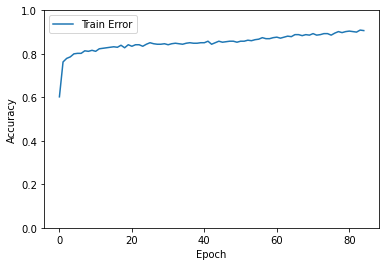

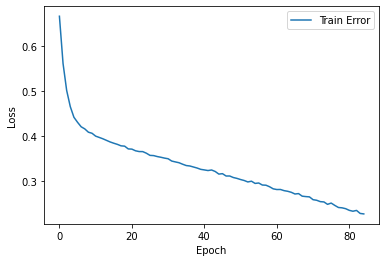

In [298]:
plot_history(history)

In [299]:
test_loss, test_acc = model.evaluate(X_train_n, train_labels,verbose=0)
print('Test accuracy',test_acc)
print('Test loss', test_loss)

Test accuracy 0.886617124080658
Test loss 0.283651739358902


# differnce optimizer

In [300]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [301]:
history2=model.fit(X_train_n, train_labels, epochs=85, batch_size=9)

Epoch 1/85
60/60 [==============================] - 1s 1ms/step - loss: 0.3094 - accuracy: 0.8717
Epoch 2/85
60/60 [==============================] - 0s 1ms/step - loss: 0.2876 - accuracy: 0.8829
Epoch 3/85
60/60 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8736
Epoch 4/85
60/60 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.8829
Epoch 5/85
60/60 [==============================] - 0s 2ms/step - loss: 0.2751 - accuracy: 0.8736
Epoch 6/85
60/60 [==============================] - 0s 1ms/step - loss: 0.2693 - accuracy: 0.8959
Epoch 7/85
60/60 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.8885
Epoch 8/85
60/60 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.8866
Epoch 9/85
60/60 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.8996
Epoch 10/85
60/60 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.8978
Epoch 11/85
60/60 [

In [302]:
def plot_history(history2):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
   # plt.plot(hist['epoch'], hist['val_mae'], label = 'Validation Error')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Error')
    #plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    #plt.ylim([0,200])
    plt.legend()
    plt.show()
    

    
    

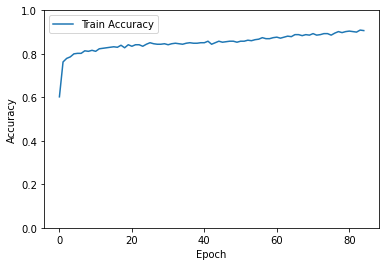

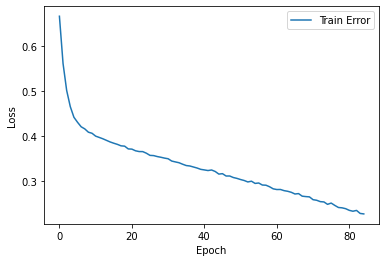

In [303]:
plot_history(history2)

In [304]:
test_loss, test_acc = model.evaluate(X_train_n, train_labels,verbose=0)
print('Test accuracy',test_acc)
print('Test loss', test_loss)

Test accuracy 0.9925650358200073
Test loss 0.06262911111116409


In [305]:
model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])

In [306]:
history3=model.fit(X_train_n, train_labels, epochs=85, batch_size=9)

Epoch 1/85
60/60 [==============================] - 1s 2ms/step - loss: 0.0602 - accuracy: 0.9926
Epoch 2/85
60/60 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9944
Epoch 3/85
60/60 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9963
Epoch 4/85
60/60 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9944
Epoch 5/85
60/60 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9963
Epoch 6/85
60/60 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9963
Epoch 7/85
60/60 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9963
Epoch 8/85
60/60 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9963
Epoch 9/85
60/60 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9963
Epoch 10/85
60/60 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9944
Epoch 11/85
60/60 [

In [307]:
def plot_history(history3):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
   # plt.plot(hist['epoch'], hist['val_mae'], label = 'Validation Error')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Error')
    #plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    #plt.ylim([0,200])
    plt.legend()
    plt.show()
    

    
    

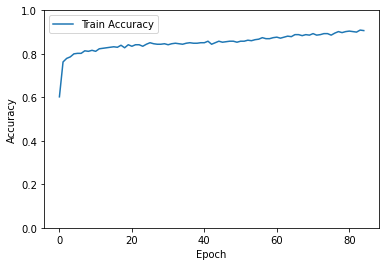

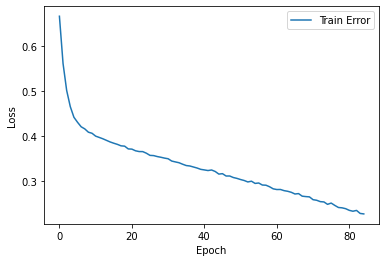

In [308]:
plot_history(history3)

In [309]:
test_loss, test_acc = model.evaluate(X_train_n, train_labels,verbose=0)
print('Test accuracy',test_acc)
print('Test loss', test_loss)

Test accuracy 0.9962825179100037
Test loss 0.047897566109895706


In [312]:
test_loss, test_acc = model.evaluate(X_train_n, train_labels,verbose=0)
print('Test accuracy',test_acc)
print('Test loss', test_loss)

Test accuracy 0.9944238066673279
Test loss 0.0198792964220047


# INFERENCE:

1) Check for overfitting and apply L1 , L2 regularisation, early stopping and dropout techniques. so apply for 3 tecnique.this tecnique in highest accuracy score in dropout.
(0.8884758353233337).

2) use to differnt optimizer  'adagrad','rmsprop','Adam . In the best optimizer accuracy level in adagrad(0.9944238066673279).
